In [795]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
from sklearn.model_selection import KFold
import seaborn as sns
from sklearn.metrics import classification_report

In [796]:
def evaluate_cv_model(model, data, target, kFolds):
    a_score = cross_val_score(model, data, target, cv=kFolds, scoring='accuracy')
    accuracy = a_score.mean()

    return accuracy

In [797]:
def plot_confusionMatrix (clf, y_test, X_test):
    
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm, annot=True, fmt='.2f', cmap="Blues")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    report = classification_report(y_test, y_pred)
    plt.show()

    return report

In [798]:
# KNN classifier
def KNN(X_train, y_train, X_test, y_test, num_neighbors):
    
    # create the model
    KNN = KNeighborsClassifier(n_neighbors = num_neighbors)
    
    # fit the model
    KNN.fit(X_train, y_train)
    
    # get the accuracy
    test_accuracy = KNN.score(X_test, y_test)
    train_accuracy = KNN.score(X_train, y_train)
    
    # predict the values
    prediction = KNN.predict(X_test)
    
    return test_accuracy, train_accuracy, prediction, KNN

In [799]:
def SVM (X_train, y_train, X_test, y_test, kernel):

    # create the model for multiclass classification
    SVM = svm.SVC(kernel=kernel, C=1, decision_function_shape='ovo')
    
    # fit the model
    SVM.fit(X_train, y_train)
    
    # get the accuracy
    test_accuracy = SVM.score(X_test, y_test)
    train_accuracy = SVM.score(X_train, y_train)
    
    # predict the values
    prediction = SVM.predict(X_test)
    
    return test_accuracy, train_accuracy, prediction, SVM

In [800]:
def Logistic_Regression (X_train, y_train, X_test, y_test):
    
    # create the model
    log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

    # fit the model
    log_reg.fit(X_train, y_train)

    # get the accuracy
    test_accuracy = log_reg.score(X_test, y_test)
    train_accuracy = log_reg.score(X_train, y_train)

    # predict the values
    prediction = log_reg.predict(X_test)

    return test_accuracy, train_accuracy, prediction, log_reg

## Read the data

In [801]:
# EEG + ECG data
Both_data = pd.read_csv('Final_Data.csv')

EEG_data = pd.read_csv('preprocessed_EEG.csv')

ECG_data = pd.read_csv('preprocessed_ECG.csv')
#ECG_data = pd.read_csv('ECG.csv')

In [802]:
# #drop unnecessary columns
# Both_data.drop(['Unnamed: 0','video','video_name'], axis=1, inplace=True)
# EEG_data.drop(['Unnamed: 0','video','video_name'], axis=1, inplace=True)
# ECG_data.drop(['Unnamed: 0','video','video_name'], axis=1, inplace=True)

In [803]:
#drop unnecessary columns
Both_data.drop(['Unnamed: 0','video'], axis=1, inplace=True)
EEG_data.drop(['Unnamed: 0','video'], axis=1, inplace=True)
ECG_data.drop(['Unnamed: 0','video'], axis=1, inplace=True)

In [804]:
# # drop unnecessary columns
# Both_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# EEG_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# ECG_data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [805]:
y_Both = Both_data.target
X_Both = Both_data.drop('target' , axis = 1)

In [806]:
y_EEG = EEG_data.target
X_EEG = EEG_data.drop('target' , axis = 1)

In [807]:
y_ECG = ECG_data.target
X_ECG = ECG_data.drop('target' , axis = 1)

## Splitting the data

In [808]:
kf = KFold(n_splits=8, random_state=42 , shuffle = True)

In [809]:
X_train_Both, X_test_Both, y_train_Both, y_test_Both = train_test_split(X_Both, y_Both, test_size = 0.2, random_state = 42)
X_train_EEG, X_test_EEG, y_train_EEG, y_test_EEG = train_test_split(X_EEG, y_EEG, test_size = 0.2, random_state = 42)
X_train_ECG, X_test_ECG, y_train_ECG, y_test_ECG = train_test_split(X_ECG, y_ECG, test_size = 0.2, random_state = 42)

In [810]:
y_test_Both = np.array(y_test_Both)
y_test_EEG = np.array(y_test_EEG)
y_test_ECG = np.array(y_test_ECG)

In [811]:
# Function to evaluate the model
def Evaluate (y_test, prediction):
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction, average='weighted')
    recall = recall_score(y_test, prediction, average='weighted')
    f1 = f1_score(y_test, prediction, average='weighted')
    return accuracy, precision, recall, f1

# KNN model

## EEG Data

### Choosing the best k value

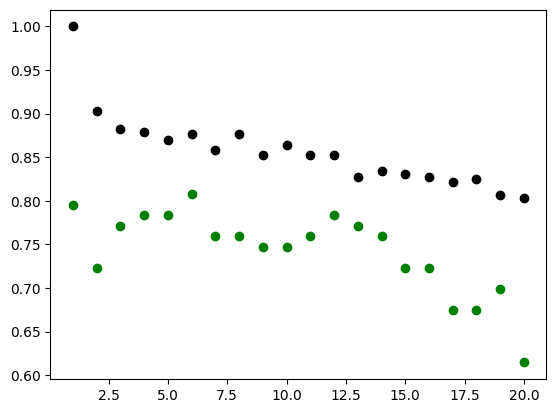

In [812]:
K = []
training = []
test = []
scores = {}
  
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_EEG, y_train_EEG)
  
    training_score = knn.score(X_train_EEG, y_train_EEG)
    test_score = knn.score(X_test_EEG, y_test_EEG)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]
    
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()

### Evaluation without Cross Validation

In [889]:
KNN_test, KNN_train, KNN_prediction, KNN_model = KNN(X_train_EEG, y_train_EEG, X_test_EEG, y_test_EEG, 6)## 11
#print(KNN_test*100, KNN_train*100)
print(f"Triaing Accuracy: {KNN_train*100}\nTesting Accuracy: {KNN_test*100}")

Triaing Accuracy: 87.61329305135952
Testing Accuracy: 80.72289156626506


### Evaulation with Cross Validation

In [814]:
cv_accuracy = evaluate_cv_model(KNN_model, X_EEG, y_EEG, kf)
print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 73.68024132730015


### Confusion Matrix

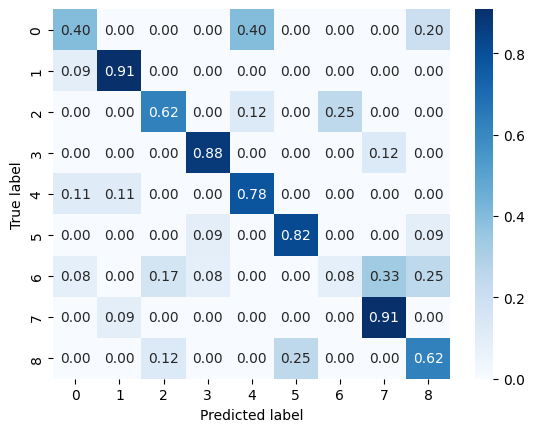

In [815]:
report = plot_confusionMatrix(KNN_model, y_test_EEG, X_test_EEG)

### Classification Report

In [816]:
print(report)

              precision    recall  f1-score   support

           0       0.40      0.40      0.40         5
           1       0.83      0.91      0.87        11
           2       0.62      0.62      0.62         8
           3       0.78      0.88      0.82         8
           4       0.70      0.78      0.74         9
           5       0.82      0.82      0.82        11
           6       0.33      0.08      0.13        12
           7       0.67      0.91      0.77        11
           8       0.50      0.62      0.56         8

    accuracy                           0.67        83
   macro avg       0.63      0.67      0.64        83
weighted avg       0.64      0.67      0.64        83



## ECG Data

### Choosing the best k value

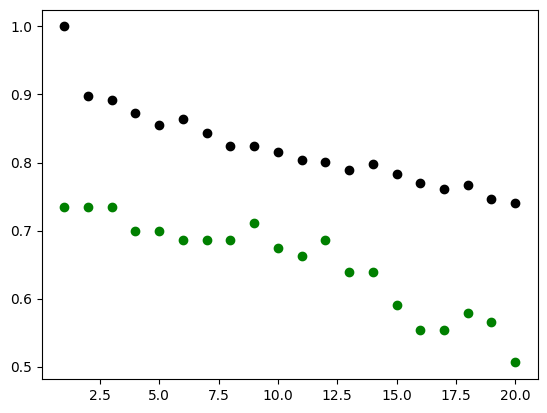

In [887]:
K = []
training = []
test = []
scores = {}
  
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_ECG, y_train_ECG)
  
    training_score = knn.score(X_train_ECG, y_train_ECG)
    test_score = knn.score(X_test_ECG, y_test_ECG)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]
    
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()

### Evaluation without Cross Validation

In [888]:
KNN_test, KNN_train, KNN_prediction, KNN_model = KNN(X_train_ECG, y_train_ECG, X_test_ECG, y_test_ECG, 8)## 6
print(f"Triaing Accuracy: {KNN_train*100}\nTesting Accuracy: {KNN_test*100}")

Triaing Accuracy: 82.4773413897281
Testing Accuracy: 68.67469879518072


### Evaluation with Cross Validation

In [819]:
cv_accuracy = evaluate_cv_model(KNN_model, X_ECG, y_ECG, kf)
print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 75.61274509803921


### Confusion Matrix

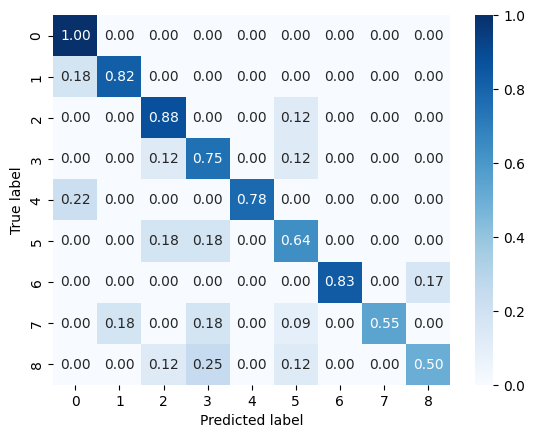

In [820]:
report = plot_confusionMatrix(KNN_model, y_test_ECG, X_test_ECG)

### Classification Report

In [821]:
print(report)

              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       0.82      0.82      0.82        11
           2       0.64      0.88      0.74         8
           3       0.50      0.75      0.60         8
           4       1.00      0.78      0.88         9
           5       0.64      0.64      0.64        11
           6       1.00      0.83      0.91        12
           7       1.00      0.55      0.71        11
           8       0.67      0.50      0.57         8

    accuracy                           0.73        83
   macro avg       0.76      0.75      0.73        83
weighted avg       0.79      0.73      0.74        83



## ECG + EEG Data

### Choosing the best k value

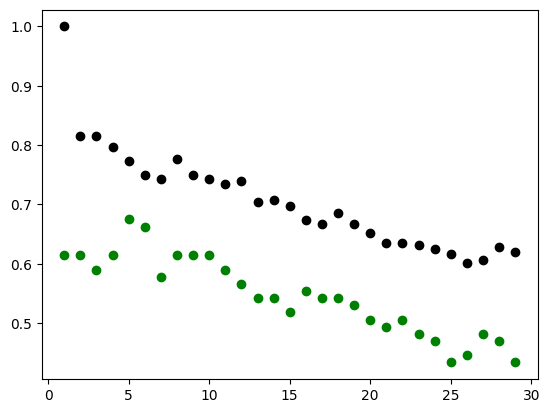

In [822]:
K = []
training = []
test = []
scores = {}
  
for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_Both, y_train_Both)
  
    training_score = knn.score(X_train_Both, y_train_Both)
    test_score = knn.score(X_test_Both, y_test_Both)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]
    
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()

### Evaluation without Cross Validation

In [890]:
KNN_test, KNN_train, KNN_prediction, KNN_model = KNN(X_train_Both, y_train_Both, X_test_Both, y_test_Both, 5)### 6
print(f"Triaing Accuracy: {KNN_train*100}\nTesting Accuracy: {KNN_test*100}")

Triaing Accuracy: 77.34138972809667
Testing Accuracy: 67.46987951807229


### Evaluation with Cross Validation

In [824]:
cv_accuracy = evaluate_cv_model(KNN_model, X_Both, y_Both, kf)
print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 61.15196078431373


### Confusion Matrix

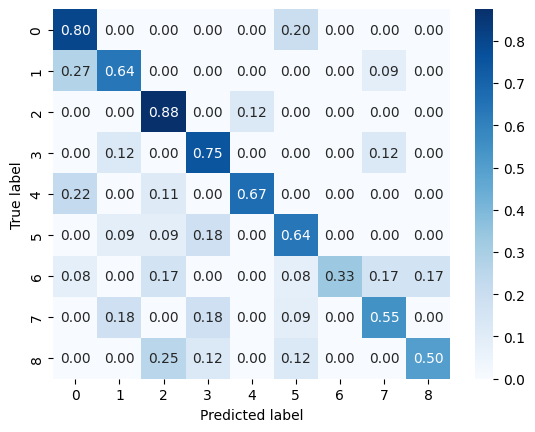

In [825]:
report = plot_confusionMatrix(KNN_model, y_test_Both, X_test_Both)

### Classification Report

In [826]:
print(report)

              precision    recall  f1-score   support

           0       0.40      0.80      0.53         5
           1       0.64      0.64      0.64        11
           2       0.54      0.88      0.67         8
           3       0.55      0.75      0.63         8
           4       0.86      0.67      0.75         9
           5       0.64      0.64      0.64        11
           6       1.00      0.33      0.50        12
           7       0.60      0.55      0.57        11
           8       0.67      0.50      0.57         8

    accuracy                           0.61        83
   macro avg       0.65      0.64      0.61        83
weighted avg       0.68      0.61      0.61        83



# SVM models

## EEG Data

### Linear Kernel

### Evaluation without Cross Validation

In [827]:
SVM_linear_test, SVM_linear_train, SVM_linear_prediction, SVM_model_linear = SVM(X_train_EEG, y_train_EEG, X_test_EEG, y_test_EEG, 'linear')

print(f"Triaing Accuracy: {SVM_linear_train*100}\nTesting Accuracy: {SVM_linear_test*100}")

Triaing Accuracy: 34.13897280966767
Testing Accuracy: 21.686746987951807


### Evaluation with Cross Validation

In [828]:
cv_accuracy = evaluate_cv_model(SVM_model_linear, X_EEG, y_EEG, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 23.666101055806937


### Confusion Matrix

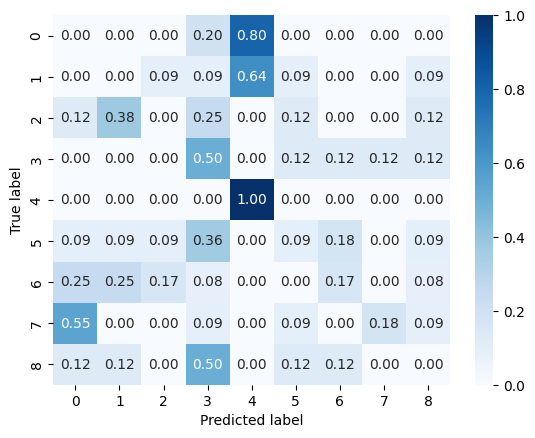

In [829]:
report = plot_confusionMatrix(SVM_model_linear, y_test_EEG, X_test_EEG)

### Classification Report

In [830]:
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         8
           3       0.22      0.50      0.31         8
           4       0.45      1.00      0.62         9
           5       0.17      0.09      0.12        11
           6       0.33      0.17      0.22        12
           7       0.67      0.18      0.29        11
           8       0.00      0.00      0.00         8

    accuracy                           0.22        83
   macro avg       0.20      0.22      0.17        83
weighted avg       0.23      0.22      0.18        83



### RBF Kernel

### Evaluation without Cross Validation

In [831]:
SVM_RBF_test, SVM_RBF_train, SVM_RBF_prediction, SVM_model_RBF = SVM(X_train_EEG, y_train_EEG, X_test_EEG, y_test_EEG, 'rbf')

print(f"Triaing Accuracy: {SVM_RBF_train*100}\nTesting Accuracy: {SVM_RBF_test*100}")

Triaing Accuracy: 33.23262839879154
Testing Accuracy: 31.32530120481928


### Evaluation with Cross Validation

In [832]:
cv_accuracy = evaluate_cv_model(SVM_model_RBF, X_EEG, y_EEG, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 28.50207390648567


### Confusion Matrix

c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


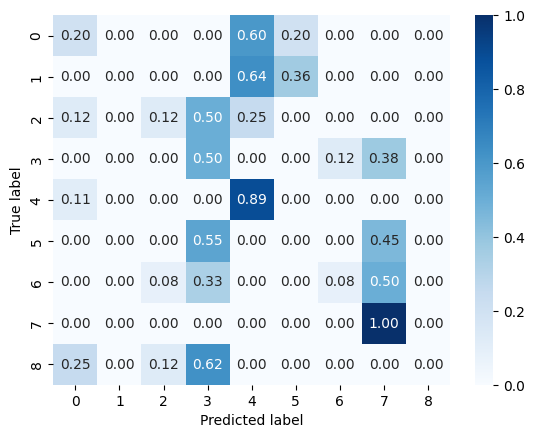

In [833]:
report = plot_confusionMatrix(SVM_model_RBF, y_test_EEG, X_test_EEG)

### Classification Report

In [834]:
print(report)

              precision    recall  f1-score   support

           0       0.20      0.20      0.20         5
           1       0.00      0.00      0.00        11
           2       0.33      0.12      0.18         8
           3       0.17      0.50      0.26         8
           4       0.40      0.89      0.55         9
           5       0.00      0.00      0.00        11
           6       0.50      0.08      0.14        12
           7       0.44      1.00      0.61        11
           8       0.00      0.00      0.00         8

    accuracy                           0.31        83
   macro avg       0.23      0.31      0.22        83
weighted avg       0.23      0.31      0.22        83



### Sigmoid Kernel

### Evaluation without Cross Validation

In [835]:
SVM_sigmoid_test, SVM_sigmoid_train, SVM_sigmoid_prediction, SVM_model_sigmoid = SVM(X_train_EEG, y_train_EEG, X_test_EEG, y_test_EEG, 'sigmoid')

print(f"Triaing Accuracy: {SVM_sigmoid_train*100}\nTesting Accuracy: {SVM_sigmoid_test*100}")

Triaing Accuracy: 20.84592145015106
Testing Accuracy: 18.072289156626507


### Evaluation with Cross Validation

In [836]:
cv_accuracy = evaluate_cv_model(SVM_model_sigmoid, X_EEG, y_EEG, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 16.940045248868778


### Confusion Matrix

c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


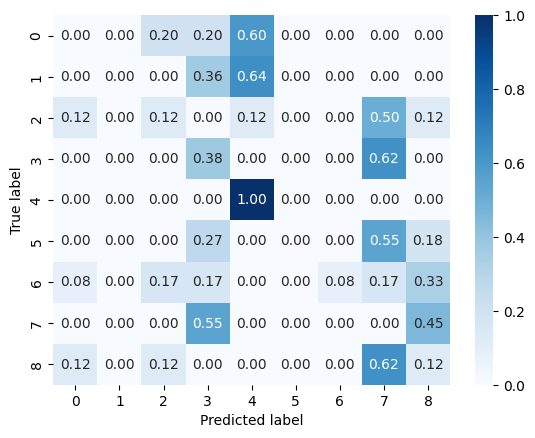

In [837]:
report = plot_confusionMatrix(SVM_model_sigmoid, y_test_EEG, X_test_EEG)

### Classification Report

In [838]:
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        11
           2       0.20      0.12      0.15         8
           3       0.16      0.38      0.22         8
           4       0.45      1.00      0.62         9
           5       0.00      0.00      0.00        11
           6       1.00      0.08      0.15        12
           7       0.00      0.00      0.00        11
           8       0.08      0.12      0.10         8

    accuracy                           0.18        83
   macro avg       0.21      0.19      0.14        83
weighted avg       0.24      0.18      0.13        83



### Polynomial Kernel

### Evaluation without Cross Validation

In [839]:
SVM_poly_test, SVM_poly_train, SVM_poly_prediction, SVM_model_Poly = SVM(X_train_EEG, y_train_EEG, X_test_EEG, y_test_EEG, 'poly')

print(f"Triaing Accuracy: {SVM_poly_train*100}\nTesting Accuracy: {SVM_poly_test*100}")

Triaing Accuracy: 29.909365558912388
Testing Accuracy: 18.072289156626507


### Evaluation with Cross Validation

In [840]:
cv_accuracy = evaluate_cv_model(SVM_model_Poly, X_EEG, y_EEG, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 21.780731523378584


### Confusion Matrix

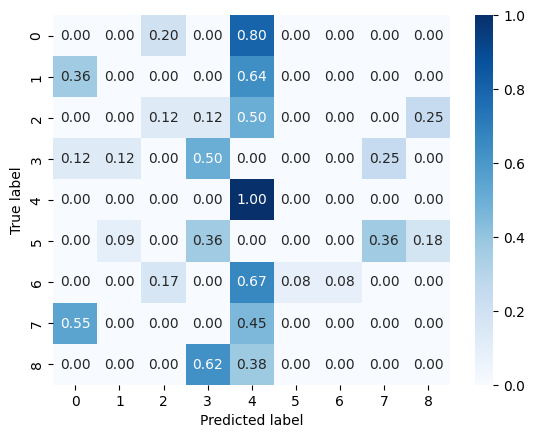

In [841]:
report = plot_confusionMatrix(SVM_model_Poly, y_test_EEG, X_test_EEG)

### Classification Report

In [842]:
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        11
           2       0.25      0.12      0.17         8
           3       0.29      0.50      0.36         8
           4       0.23      1.00      0.37         9
           5       0.00      0.00      0.00        11
           6       1.00      0.08      0.15        12
           7       0.00      0.00      0.00        11
           8       0.00      0.00      0.00         8

    accuracy                           0.18        83
   macro avg       0.20      0.19      0.12        83
weighted avg       0.22      0.18      0.11        83



## ECG Data

### Linear Kernel

### Evaluation without Cross Validation

In [843]:
SVM_linear_test, SVM_linear_train, SVM_linear_prediction, SVM_model_linear = SVM(X_train_ECG, y_train_ECG, X_test_ECG, y_test_ECG, 'linear')

print(f"Triaing Accuracy: {SVM_linear_train*100}\nTesting Accuracy: {SVM_linear_test*100}")

Triaing Accuracy: 57.70392749244713
Testing Accuracy: 45.78313253012048


### Evaluation with Cross Validation

In [844]:
cv_accuracy = evaluate_cv_model(SVM_model_linear, X_ECG, y_ECG, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 45.192307692307686


### Confusion Matrix

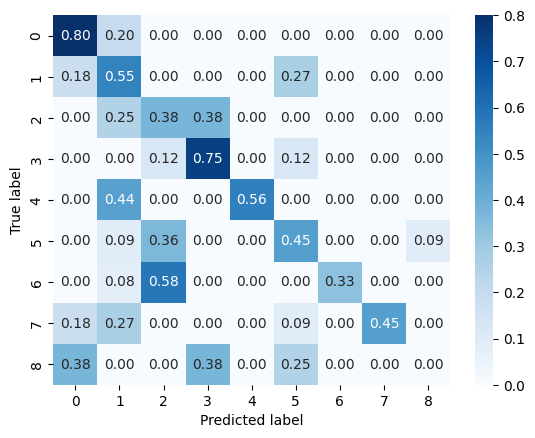

In [845]:
report = plot_confusionMatrix(SVM_model_linear, y_test_ECG, X_test_ECG)

### Classification Report

In [846]:
print(report)

              precision    recall  f1-score   support

           0       0.36      0.80      0.50         5
           1       0.33      0.55      0.41        11
           2       0.20      0.38      0.26         8
           3       0.50      0.75      0.60         8
           4       1.00      0.56      0.71         9
           5       0.42      0.45      0.43        11
           6       1.00      0.33      0.50        12
           7       1.00      0.45      0.62        11
           8       0.00      0.00      0.00         8

    accuracy                           0.46        83
   macro avg       0.53      0.47      0.45        83
weighted avg       0.57      0.46      0.46        83



### RBF Kernel

### Evaluation without Cross Validation

In [847]:
SVM_RBF_test, SVM_RBF_train, SVM_RBF_prediction, SVM_model_RBF = SVM(X_train_ECG, y_train_ECG, X_test_ECG, y_test_ECG, 'rbf')

print(f"Triaing Accuracy: {SVM_RBF_train*100}\nTesting Accuracy: {SVM_RBF_test*100}")

Triaing Accuracy: 40.78549848942598
Testing Accuracy: 36.144578313253014


### Evaluation with Cross Validation

In [848]:
cv_accuracy = evaluate_cv_model(SVM_model_RBF, X_ECG, y_ECG, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 38.41440422322775


### Confusion Matrix

c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


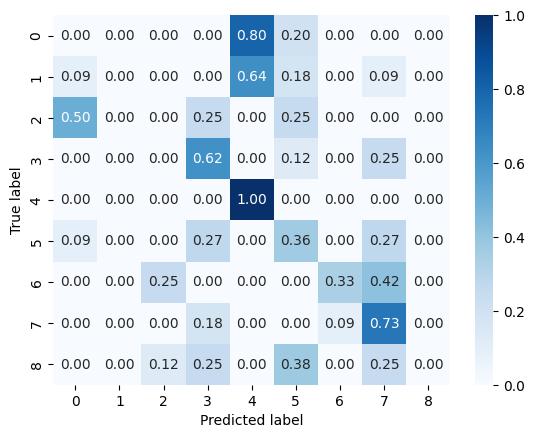

In [849]:
report = plot_confusionMatrix(SVM_model_RBF, y_test_ECG, X_test_ECG)

### Classification Report

In [850]:
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         8
           3       0.36      0.62      0.45         8
           4       0.45      1.00      0.62         9
           5       0.31      0.36      0.33        11
           6       0.80      0.33      0.47        12
           7       0.38      0.73      0.50        11
           8       0.00      0.00      0.00         8

    accuracy                           0.36        83
   macro avg       0.26      0.34      0.26        83
weighted avg       0.29      0.36      0.29        83



### Sigmoid Kernel

### Evaluation without Cross Validation

In [851]:
SVM_sigmoid_test, SVM_sigmoid_train, SVM_sigmoid_prediction, SVM_model_sigmoid = SVM(X_train_ECG, y_train_ECG, X_test_ECG, y_test_ECG, 'sigmoid')

print(f"Triaing Accuracy: {SVM_sigmoid_train*100}\nTesting Accuracy: {SVM_sigmoid_test*100}")

Triaing Accuracy: 16.91842900302115
Testing Accuracy: 14.457831325301203


### Evaluation with Cross Validation

In [852]:
cv_accuracy = evaluate_cv_model(SVM_model_sigmoid, X_ECG, y_ECG, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 15.238499245852186


### Confusion Matrix

c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


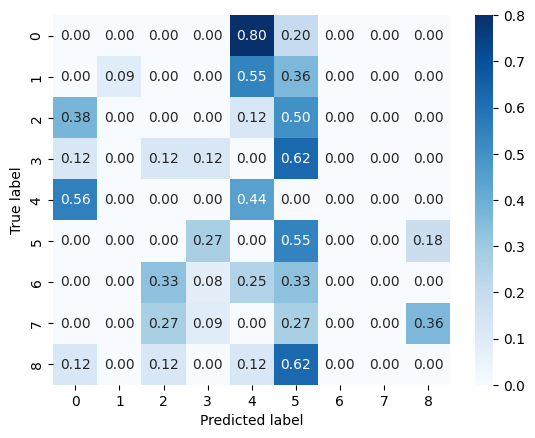

In [853]:
report = plot_confusionMatrix(SVM_model_sigmoid, y_test_ECG, X_test_ECG)

### Classification Report

In [854]:
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.09      0.17        11
           2       0.00      0.00      0.00         8
           3       0.17      0.12      0.14         8
           4       0.21      0.44      0.29         9
           5       0.19      0.55      0.28        11
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00        11
           8       0.00      0.00      0.00         8

    accuracy                           0.14        83
   macro avg       0.17      0.13      0.10        83
weighted avg       0.20      0.14      0.10        83



### Polynomial Kernel

### Evaluation without Cross Validation

In [855]:
SVM_poly_test, SVM_poly_train, SVM_poly_prediction, SVM_model_Poly = SVM(X_train_ECG, y_train_ECG, X_test_ECG, y_test_ECG, 'poly')

print(f"Triaing Accuracy: {SVM_poly_train*100}\nTesting Accuracy: {SVM_poly_test*100}")

Triaing Accuracy: 38.066465256797585
Testing Accuracy: 27.710843373493976


### Evaluation with Cross Validation

In [856]:
cv_accuracy = evaluate_cv_model(SVM_model_Poly, X_ECG, y_ECG, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 33.86123680241327


### Confusion Matrix

c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


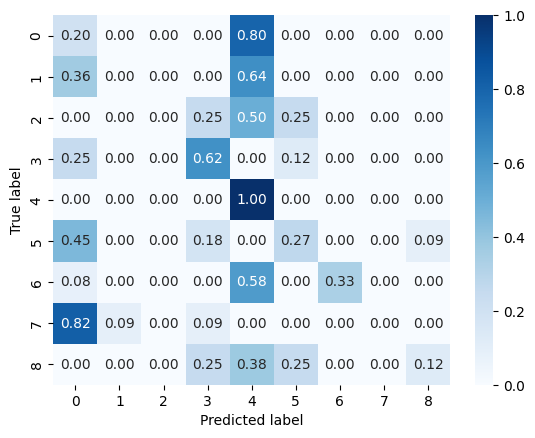

In [857]:
report = plot_confusionMatrix(SVM_model_Poly, y_test_ECG, X_test_ECG)

### Classification Report

In [858]:
print(report)

              precision    recall  f1-score   support

           0       0.05      0.20      0.07         5
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         8
           3       0.42      0.62      0.50         8
           4       0.26      1.00      0.42         9
           5       0.38      0.27      0.32        11
           6       1.00      0.33      0.50        12
           7       0.00      0.00      0.00        11
           8       0.50      0.12      0.20         8

    accuracy                           0.28        83
   macro avg       0.29      0.28      0.22        83
weighted avg       0.31      0.28      0.23        83



## ECG + EEG Data

### Linear Kernel

### Evaluation without Cross Validation

In [859]:
SVM_linear_test, SVM_linear_train, SVM_linear_prediction, SVM_model_linear = SVM(X_train_Both, y_train_Both, X_test_Both, y_test_Both, 'linear')

print(f"Triaing Accuracy: {SVM_linear_train*100}\nTesting Accuracy: {SVM_linear_test*100}")

Triaing Accuracy: 69.48640483383686
Testing Accuracy: 42.168674698795186


### Evaluation with Cross Validation

In [860]:
cv_accuracy = evaluate_cv_model(SVM_model_linear, X_Both, y_Both, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 40.35162141779789


### Confusion Matrix

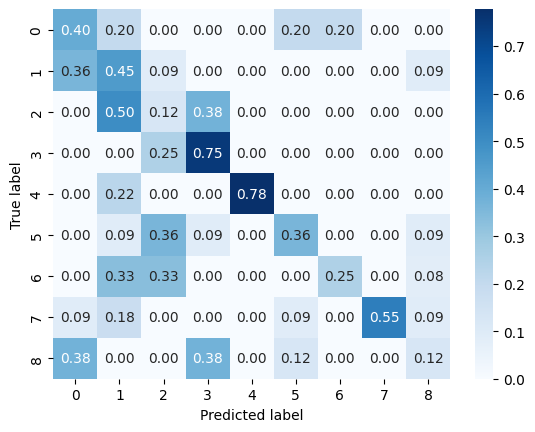

In [861]:
report = plot_confusionMatrix(SVM_model_linear, y_test_Both, X_test_Both)

### Classification Report

In [862]:
print(report)

              precision    recall  f1-score   support

           0       0.20      0.40      0.27         5
           1       0.26      0.45      0.33        11
           2       0.08      0.12      0.10         8
           3       0.46      0.75      0.57         8
           4       1.00      0.78      0.88         9
           5       0.57      0.36      0.44        11
           6       0.75      0.25      0.38        12
           7       1.00      0.55      0.71        11
           8       0.20      0.12      0.15         8

    accuracy                           0.42        83
   macro avg       0.50      0.42      0.43        83
weighted avg       0.54      0.42      0.44        83



### RBF Kernel

### Evaluation without Cross Validation

In [863]:
SVM_RBF_test, SVM_RBF_train, SVM_RBF_prediction, SVM_model_RBF = SVM(X_train_Both, y_train_Both, X_test_Both, y_test_Both, 'rbf')

print(f"Triaing Accuracy: {SVM_RBF_train*100}\nTesting Accuracy: {SVM_RBF_test*100}")

Triaing Accuracy: 43.80664652567976
Testing Accuracy: 37.34939759036144


### Evaluation with Cross Validation

In [864]:
cv_accuracy = evaluate_cv_model(SVM_model_RBF, X_Both, y_Both, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 34.54939668174962


### Confusion Matrix

c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


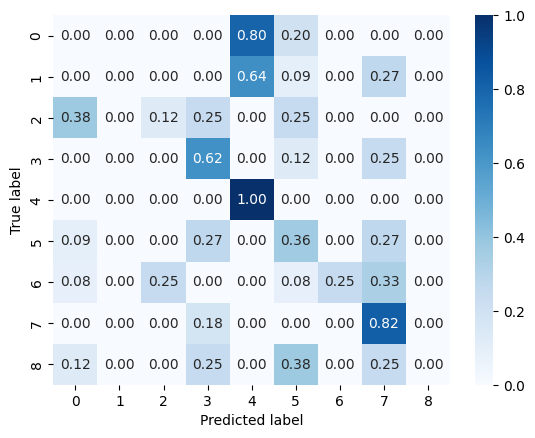

In [865]:
report = plot_confusionMatrix(SVM_model_RBF, y_test_Both, X_test_Both)

### Classification Report

In [866]:
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        11
           2       0.25      0.12      0.17         8
           3       0.36      0.62      0.45         8
           4       0.45      1.00      0.62         9
           5       0.31      0.36      0.33        11
           6       1.00      0.25      0.40        12
           7       0.39      0.82      0.53        11
           8       0.00      0.00      0.00         8

    accuracy                           0.37        83
   macro avg       0.31      0.35      0.28        83
weighted avg       0.34      0.37      0.30        83



### Sigmoid Kernel

### Evaluation without Cross Validation

In [867]:
SVM_sigmoid_test, SVM_sigmoid_train, SVM_sigmoid_prediction, SVM_model_sigmoid = SVM(X_train_Both, y_train_Both, X_test_Both, y_test_Both, 'sigmoid')

print(f"Triaing Accuracy: {SVM_sigmoid_train*100}\nTesting Accuracy: {SVM_sigmoid_test*100}")

Triaing Accuracy: 16.61631419939577
Testing Accuracy: 16.867469879518072


### Evaluation with Cross Validation

In [868]:
cv_accuracy = evaluate_cv_model(SVM_model_sigmoid, X_Both, y_Both, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 17.63763197586727


### Confusion Matrix

c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


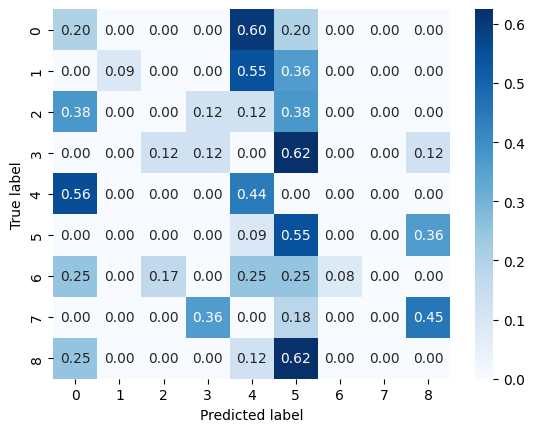

In [869]:
report = plot_confusionMatrix(SVM_model_sigmoid, y_test_Both, X_test_Both)

### Classification Report

In [870]:
print(report)

              precision    recall  f1-score   support

           0       0.07      0.20      0.11         5
           1       1.00      0.09      0.17        11
           2       0.00      0.00      0.00         8
           3       0.17      0.12      0.14         8
           4       0.21      0.44      0.29         9
           5       0.21      0.55      0.30        11
           6       1.00      0.08      0.15        12
           7       0.00      0.00      0.00        11
           8       0.00      0.00      0.00         8

    accuracy                           0.17        83
   macro avg       0.30      0.17      0.13        83
weighted avg       0.35      0.17      0.14        83



### Polynomial Kernel

### Evaluation without Cross Validation

In [871]:
SVM_poly_test, SVM_poly_train, SVM_poly_prediction, SVM_model_Poly = SVM(X_train_Both, y_train_Both, X_test_Both, y_test_Both, 'poly')

print(f"Triaing Accuracy: {SVM_poly_train*100}\nTesting Accuracy: {SVM_poly_test*100}")

Triaing Accuracy: 42.59818731117825
Testing Accuracy: 27.710843373493976


### Evaluation with Cross Validation

In [872]:
cv_accuracy = evaluate_cv_model(SVM_model_Poly, X_Both, y_Both, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 29.98208898944193


### Confusion Matrix

c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


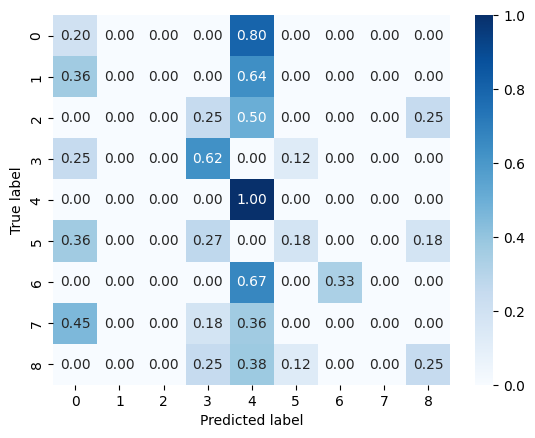

In [873]:
report = plot_confusionMatrix(SVM_model_Poly, y_test_Both, X_test_Both)

### Classification Report

In [874]:
print(report)

              precision    recall  f1-score   support

           0       0.06      0.20      0.10         5
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         8
           3       0.36      0.62      0.45         8
           4       0.23      1.00      0.38         9
           5       0.50      0.18      0.27        11
           6       1.00      0.33      0.50        12
           7       0.00      0.00      0.00        11
           8       0.33      0.25      0.29         8

    accuracy                           0.28        83
   macro avg       0.28      0.29      0.22        83
weighted avg       0.31      0.28      0.23        83



# Logistic Regression model

## EEG Data

### Evaluation without Cross Validation

In [875]:
LOG_REG_test, LOG_REG_train, LOG_REG_prediction, LOG_REG_model = Logistic_Regression(X_train_EEG, y_train_EEG, X_test_EEG, y_test_EEG)

print(f"Triaing Accuracy: {LOG_REG_train*100}\nTesting Accuracy: {LOG_REG_test*100}")

Triaing Accuracy: 27.794561933534744
Testing Accuracy: 16.867469879518072


c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluation with Cross Validation

In [876]:
cv_accuracy = evaluate_cv_model(LOG_REG_model, X_EEG, y_EEG, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Cross Validation Accuracy: 19.570135746606336


c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

### Confusion Matrix

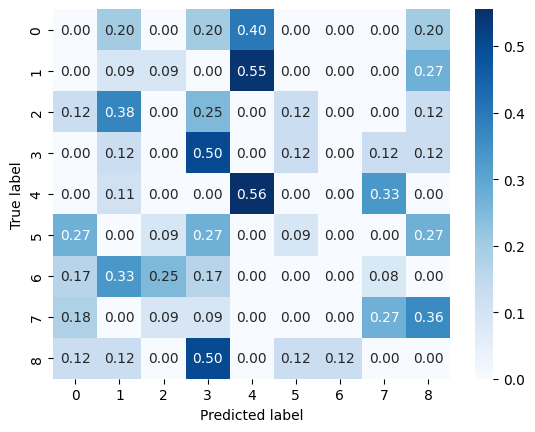

In [877]:
report = plot_confusionMatrix(LOG_REG_model, y_test_EEG, X_test_EEG)

### Classification Report

In [878]:
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.08      0.09      0.09        11
           2       0.00      0.00      0.00         8
           3       0.24      0.50      0.32         8
           4       0.38      0.56      0.45         9
           5       0.25      0.09      0.13        11
           6       0.00      0.00      0.00        12
           7       0.38      0.27      0.32        11
           8       0.00      0.00      0.00         8

    accuracy                           0.17        83
   macro avg       0.15      0.17      0.15        83
weighted avg       0.16      0.17      0.15        83



## ECG Data

### Evaluation without Cross Validation

In [879]:
LOG_REG_test, LOG_REG_train, LOG_REG_prediction, LOG_REG_model = Logistic_Regression(X_train_ECG, y_train_ECG, X_test_ECG, y_test_ECG)

print(f"Triaing Accuracy: {LOG_REG_train*100}\nTesting Accuracy: {LOG_REG_test*100}")

Triaing Accuracy: 41.69184290030212
Testing Accuracy: 26.506024096385545


c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluation with Cross Validation

In [880]:
cv_accuracy = evaluate_cv_model(LOG_REG_model, X_ECG, y_ECG, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Cross Validation Accuracy: 29.2420814479638


c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

### Confusion Matrix

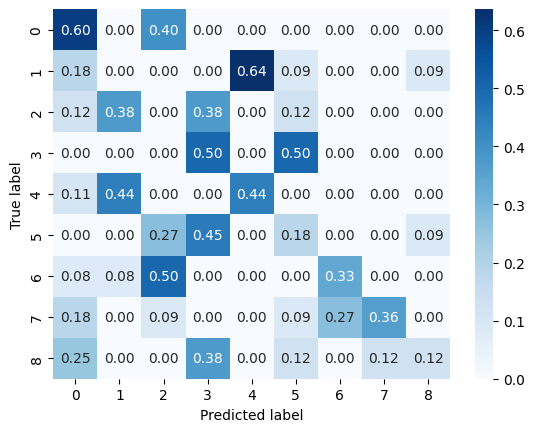

In [881]:
report = plot_confusionMatrix(LOG_REG_model, y_test_ECG, X_test_ECG)

### Classification Report

In [882]:
print(report)

              precision    recall  f1-score   support

           0       0.25      0.60      0.35         5
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         8
           3       0.27      0.50      0.35         8
           4       0.36      0.44      0.40         9
           5       0.20      0.18      0.19        11
           6       0.57      0.33      0.42        12
           7       0.80      0.36      0.50        11
           8       0.33      0.12      0.18         8

    accuracy                           0.27        83
   macro avg       0.31      0.28      0.27        83
weighted avg       0.33      0.27      0.27        83



## ECG + EEG Data

### Evaluation without Cross Validation

In [883]:
LOG_REG_test, LOG_REG_train, LOG_REG_prediction, LOG_REG_model = Logistic_Regression(X_train_Both, y_train_Both, X_test_Both, y_test_Both)

print(f"Triaing Accuracy: {LOG_REG_train*100}\nTesting Accuracy: {LOG_REG_test*100}")

Triaing Accuracy: 50.755287009063444
Testing Accuracy: 31.32530120481928


c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluation with Cross Validation

In [884]:
cv_accuracy = evaluate_cv_model(LOG_REG_model, X_Both, y_Both, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Cross Validation Accuracy: 30.444004524886882


### Confusion Matrix

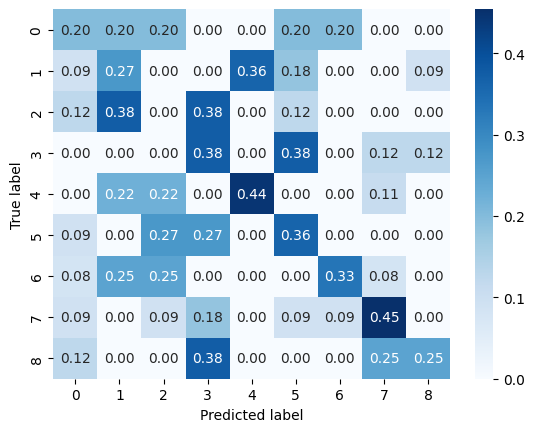

In [885]:
report = plot_confusionMatrix(LOG_REG_model, y_test_Both, X_test_Both)

### Classification Report

In [886]:
print(report)

              precision    recall  f1-score   support

           0       0.14      0.20      0.17         5
           1       0.25      0.27      0.26        11
           2       0.00      0.00      0.00         8
           3       0.21      0.38      0.27         8
           4       0.50      0.44      0.47         9
           5       0.33      0.36      0.35        11
           6       0.67      0.33      0.44        12
           7       0.50      0.45      0.48        11
           8       0.50      0.25      0.33         8

    accuracy                           0.31        83
   macro avg       0.35      0.30      0.31        83
weighted avg       0.37      0.31      0.33        83

